In [1]:
import numpy as np
import scipy.stats as stats
import constants as c

# Define .txt file names

In [2]:
case1_evolved_familiar = 'pram_experiment_3/case1_evolved/familiarFits_playback.txt'   
case2_evolved_familiar = 'pram_experiment_3/case2_evolved/familiarFits_playback.txt' 
case3_evolved_familiar = 'pram_experiment_3/case3_evolved/familiarFits_playback.txt' 
#-----------------------------------------------------------------------------------------
case1_evolved_foreign = 'pram_experiment_3/case1_evolved/foreignFits.txt' 
case2_evolved_foreign = 'pram_experiment_3/case2_evolved/foreignFits.txt' 
case3_evolved_foreign = 'pram_experiment_3/case3_evolved/foreignFits.txt' 
#-----------------------------------------------------------------------------------------
case1_random_familiar = 'pram_experiment_2/case1_random/familiarFits_playback.txt'  
case2_random_familiar = 'pram_experiment_2/case2_random/familiarFits_playback.txt'  
case3_random_familiar = 'pram_experiment_2/case3_random/familiarFits_playback.txt'  
#-----------------------------------------------------------------------------------------
case1_random_foreign = 'pram_experiment_2/case1_random/foreignFits.txt' 
case2_random_foreign = 'pram_experiment_2/case2_random/foreignFits.txt' 
case3_random_foreign = 'pram_experiment_2/case3_random/foreignFits.txt' 

# Get list of swarm fitnesses for analysis

In [3]:
import numpy as np
from itertools import islice

def Get_Swarm_Fits(fitnessFile, botsPerSwarm, numLinesToRead=None):
    '''
    Parameters:
        - fitnessFile: txt file where each line is a number
        - botsPerSwarm: integer number of bots in each swarm
        - numLinesToRead: optional parameter specifying the number of lines to read from the file

    Returns:
        - bestOfEachSwarm: list of fitnesses that are the best of every <c.botsPerSwarm> robots
    '''
    # read nums from the file
    with open(fitnessFile, 'r') as file:
        lines_to_read = file if numLinesToRead is None else islice(file, numLinesToRead)
        numbers = [float(line.strip()) for line in lines_to_read]   
    # transform data from (-)=more fit to (+)=more fit
    numbers = [num*-1 for num in numbers]
    # check if the length of the list is divisible by botsPerSwarm
    if len(numbers) % botsPerSwarm != 0:
        raise ValueError("Length of the list is not divisible by botsPerSwarm")
    # compute max of every <botsPerSwarm> lines
    bestOfEachSwarm = [np.max(numbers[i:i+botsPerSwarm]) for i in range(0, len(numbers), botsPerSwarm)]
    return bestOfEachSwarm

In [4]:
# Define data
#-----------------------------------------------------------------------------------------
case1_evolved_familiar = Get_Swarm_Fits(case1_evolved_familiar, c.botsPerSwarm, 600)
case2_evolved_familiar = Get_Swarm_Fits(case2_evolved_familiar, c.botsPerSwarm, 600)
case3_evolved_familiar = Get_Swarm_Fits(case3_evolved_familiar, c.botsPerSwarm, 600)
#-----------------------------------------------------------------------------------------
case1_evolved_foreign = Get_Swarm_Fits(case1_evolved_foreign, c.botsPerSwarm, 600)
case2_evolved_foreign = Get_Swarm_Fits(case2_evolved_foreign, c.botsPerSwarm, 600)
case3_evolved_foreign = Get_Swarm_Fits(case3_evolved_foreign, c.botsPerSwarm, 600)
#-----------------------------------------------------------------------------------------
case1_random_familiar = Get_Swarm_Fits(case1_random_familiar, c.botsPerSwarm, 600)
case2_random_familiar = Get_Swarm_Fits(case2_random_familiar, c.botsPerSwarm, 600)
case3_random_familiar = Get_Swarm_Fits(case3_random_familiar, c.botsPerSwarm, 600)
#-----------------------------------------------------------------------------------------
case1_random_foreign = Get_Swarm_Fits(case1_random_foreign, c.botsPerSwarm, 600)
case2_random_foreign = Get_Swarm_Fits(case2_random_foreign, c.botsPerSwarm, 600)
case3_random_foreign = Get_Swarm_Fits(case3_random_foreign, c.botsPerSwarm, 600)

# Perform Shapiro-Wilks test to determine if data is normally distributed

In [5]:
from scipy.stats import shapiro

def Check_Normal_Distribution(data):
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data)
    # Check the p-value
    alpha = 0.05                        # significance level
    if p_value > alpha:
        print("The data is normally distributed")
    else:
        print("The data is not normally distributed")


In [6]:
## Use function on each "average swarm" list

## Check if case1 swarm fitnesses are normally distributed
Check_Normal_Distribution(case1_evolved_foreign)
Check_Normal_Distribution(case1_evolved_familiar)
#-----------------------------------------------------------------------------------------
## Check if case2 swarm fitnesses are normally distributed
Check_Normal_Distribution(case2_evolved_foreign)
Check_Normal_Distribution(case2_evolved_familiar)
#-----------------------------------------------------------------------------------------
## Check if case3 swarm fitnesses are normally distributed
Check_Normal_Distribution(case3_evolved_foreign)
Check_Normal_Distribution(case3_evolved_familiar)

The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is not normally distributed
The data is normally distributed
The data is not normally distributed


# Perform Mann Whitney U Test (We perform this instead of t-test because data is not all normally distributed)

In [7]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(list1, list2, alpha=0.05):
    """
    Perform Mann-Whitney U test to determine if there is a significant difference between two lists.

    Parameters:
        - list1: First list of values
        - list2: Second list of values
        - alpha: Significance level for the test (default is 0.05)

    Returns:
        - None
    """

    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(list1, list2)

    # Check if the result is significant
    is_significant = p_value < alpha

    # Print information
    print(f"t statistic: {statistic:.5f}, p-value: {p_value},  alpha: {alpha}, {'significant' if is_significant else 'not significant'}")
    return p_value

# Perfom MW U Test on (all evolved foreign data)
To determine which swarm does better when evolved and deployed to a cluttered environment

In [8]:
# print('----case1 vs case2----')
# mann_whitney_u_test(case1_evolved_foreign, case2_evolved_foreign, 0.05/3)              Josh said we don't need this. We just care about how case3 does relative to others

print('----case1 vs case3----')
mann_whitney_u_test(case1_evolved_foreign, case3_evolved_foreign, 0.05/2)
#-----------------------------------------------------------------------------------------
print('----case2 vs case3----')
mann_whitney_u_test(case2_evolved_foreign, case3_evolved_foreign, 0.05/2)
#-----------------------------------------------------------------------------------------
print('----case1 vs case2----')
mann_whitney_u_test(case1_evolved_foreign, case2_evolved_foreign, 0.05/2)

----case1 vs case3----
t statistic: 1815.00000, p-value: 0.9393353532121992,  alpha: 0.025, not significant
----case2 vs case3----
t statistic: 1104.00000, p-value: 0.0002618033933809891,  alpha: 0.025, significant
----case1 vs case2----
t statistic: 2494.00000, p-value: 0.00027271109308914796,  alpha: 0.025, significant


0.00027271109308914796

# Perform MW U Test on (all evolved familiar data)
To determine which swarm does better when evolved and deployed to an empty environment

In [9]:
# print('----case1 vs case2----')
# mann_whitney_u_test(case1_evolved_familiar, case2_evolved_familiar, 0.05/3)
#-----------------------------------------------------------------------------------------
print('----case1 vs case3----')
mann_whitney_u_test(case1_evolved_familiar, case3_evolved_familiar, 0.05/2)
#-----------------------------------------------------------------------------------------
print('----case2 vs case3----')
mann_whitney_u_test(case2_evolved_familiar, case3_evolved_familiar, 0.05/2)

----case1 vs case3----
t statistic: 1845.00000, p-value: 0.8153231469958828,  alpha: 0.025, not significant
----case2 vs case3----
t statistic: 1395.00000, p-value: 0.033747617925244416,  alpha: 0.025, not significant


0.033747617925244416

# Perfom MW U Test (evolved_foreign vs random_foreign)
To show that bots were evolved enough that they do better than a random bot in the foreign environment

In [10]:
mann_whitney_u_test(case1_evolved_foreign, case1_random_foreign, 0.05)        # What should significance level be? 0.5?
mann_whitney_u_test(case2_evolved_foreign, case2_random_foreign, 0.05)
mann_whitney_u_test(case3_evolved_foreign, case3_random_foreign, 0.05)

t statistic: 3457.00000, p-value: 3.487588693351749e-18,  alpha: 0.05, significant
t statistic: 3561.00000, p-value: 2.4597110151038254e-20,  alpha: 0.05, significant
t statistic: 3598.00000, p-value: 3.931323565143429e-21,  alpha: 0.05, significant


3.931323565143429e-21

# Perform MW U Test (evolved_foreign vs evolved_familiar)
To show that foreign environment is hard enough to pose a significant challenge relative to the familiar environment

In [11]:
mann_whitney_u_test(case1_evolved_foreign, case1_evolved_familiar, 0.05)
mann_whitney_u_test(case2_evolved_foreign, case2_evolved_familiar, 0.05)
mann_whitney_u_test(case3_evolved_foreign, case3_evolved_familiar, 0.05)

t statistic: 798.00000, p-value: 1.4681338558246038e-07,  alpha: 0.05, significant
t statistic: 471.00000, p-value: 3.106573721405847e-12,  alpha: 0.05, significant
t statistic: 691.00000, p-value: 5.951455309680416e-09,  alpha: 0.05, significant


5.951455309680416e-09

# Generate box plots

In [12]:
import matplotlib.pyplot as plt

def side_by_side_box_plots(*lists, labels=None, colors=None, yaxis=(-4, 12)):
    """
    Generate side-by-side box plots

    Parameters:
    - *lists: variable number of lists to plot.
    - labels: pptional list of labels for each box plot.

    Returns:
    - None 
    """
    # check if labels are provided, otherwise use default labels
    if labels is None:
        labels = [f'Case {i+1}' for i in range(len(lists))]

    # check if colors are provided, otherwise use default colors
    if colors is None:
        colors = ['black', 'black', 'black']

    for i, data in enumerate(lists):
        plt.boxplot(data, positions=[i+1], labels=[labels[i]], showmeans=True, meanline=True, meanprops=dict(linestyle='--', color='black', linewidth=1), medianprops=dict(linestyle='-', color='black'), 
                    boxprops=dict(color=colors[i]), whiskerprops=dict(color=colors[i]), flierprops=dict(marker='o', markersize=5, markeredgecolor=colors[i]),
                    capprops=dict(color=colors[i]))

    # Add labels and title
    plt.tight_layout()
    plt.ylim(yaxis)
    plt.xlabel('')
    plt.ylabel('Swarm Fitness', fontsize = '14')
    plt.xticks(fontsize='11')
    plt.yticks(fontsize='13')
    plt.title('')

    # Show the plot
    plt.show()


# Generate box plot (all evolved foreign data)

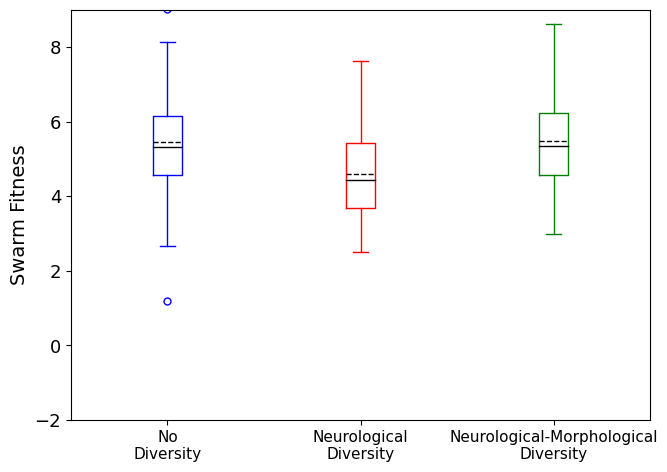

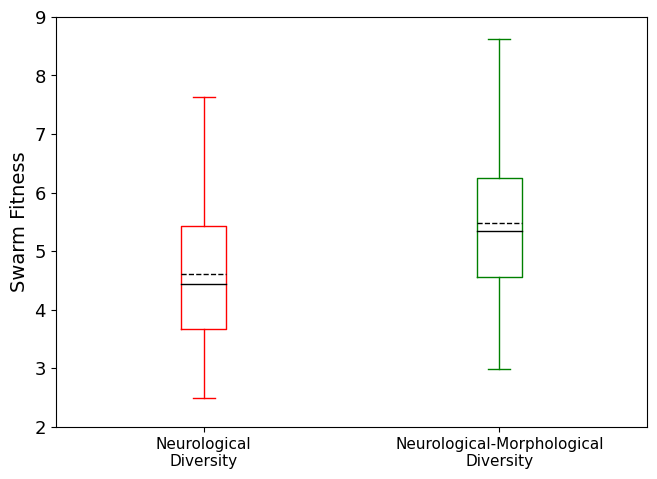

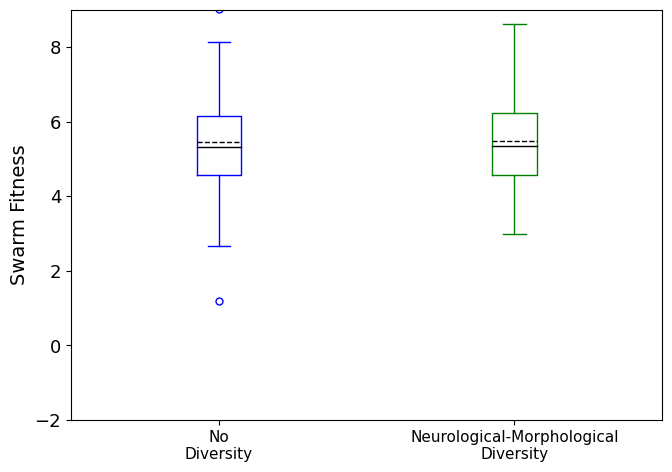

In [13]:
# Box plot for case1_evolved_foregin vs case2_evolved_foreign vs case3_evolved_foreign
side_by_side_box_plots(case1_evolved_foreign,case2_evolved_foreign ,case3_evolved_foreign, labels=['No\nDiversity', 'Neurological\nDiversity', 'Neurological-Morphological\nDiversity'],colors=['blue','red','green'], yaxis=(-2, 9))
side_by_side_box_plots(case2_evolved_foreign ,case3_evolved_foreign, labels=['Neurological\nDiversity', 'Neurological-Morphological\nDiversity'],colors=['red','green'], yaxis=(2, 9))
side_by_side_box_plots(case1_evolved_foreign ,case3_evolved_foreign, labels=['No\nDiversity', 'Neurological-Morphological\nDiversity'],colors=['blue','green'], yaxis=(-2, 9))

# Generate box plot (all evolved familiar data)
To determine which swarm does best when evolved and deployed to an empty environment

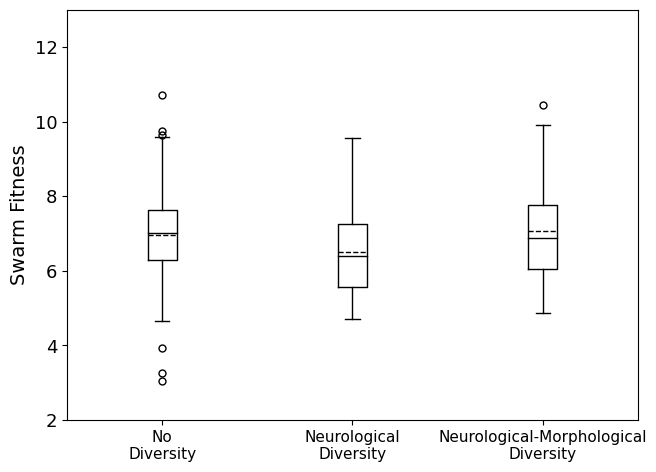

In [14]:
side_by_side_box_plots(case1_evolved_familiar,case2_evolved_familiar ,case3_evolved_familiar, labels=['No\nDiversity', 'Neurological\nDiversity', 'Neurological-Morphological\nDiversity'], yaxis=(2, 13))

# Generate box plot (evolved_foreign vs random_foreign)

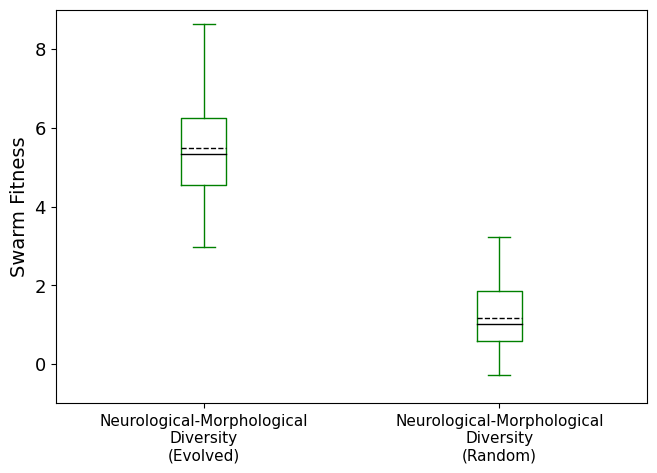

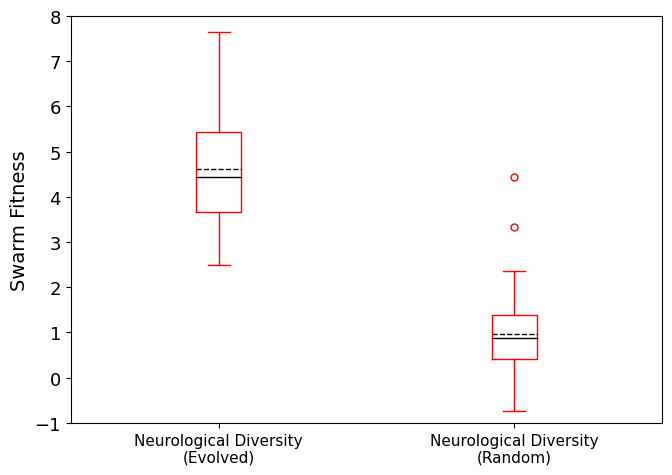

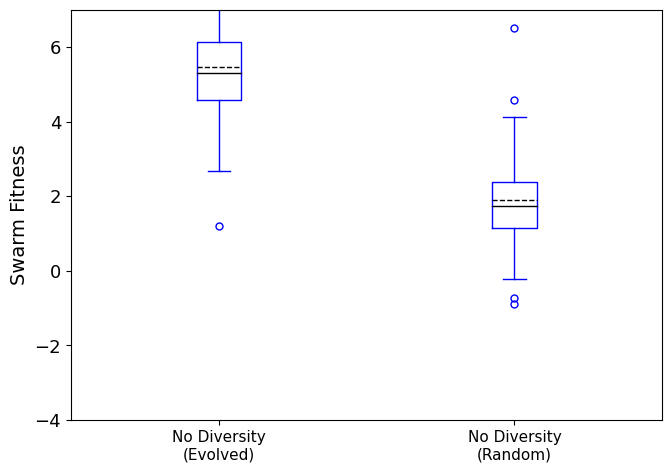

In [15]:
side_by_side_box_plots(case3_evolved_foreign,case3_random_foreign, labels=['Neurological-Morphological\nDiversity\n(Evolved)', 'Neurological-Morphological\nDiversity\n(Random)'], colors=['green', 'green'],yaxis= (-1, 9))
side_by_side_box_plots(case2_evolved_foreign,case2_random_foreign, labels=['Neurological Diversity\n(Evolved)', 'Neurological Diversity\n(Random)'], colors=['red', 'red'], yaxis= (-1, 8))
side_by_side_box_plots(case1_evolved_foreign,case1_random_foreign, labels=['No Diversity\n(Evolved)', 'No Diversity\n(Random)'], colors=['blue', 'blue'], yaxis= (-4, 7))





# Generate box plot (evolved_foreign vs evolved_familiar)
To show that environment provides significant challenge

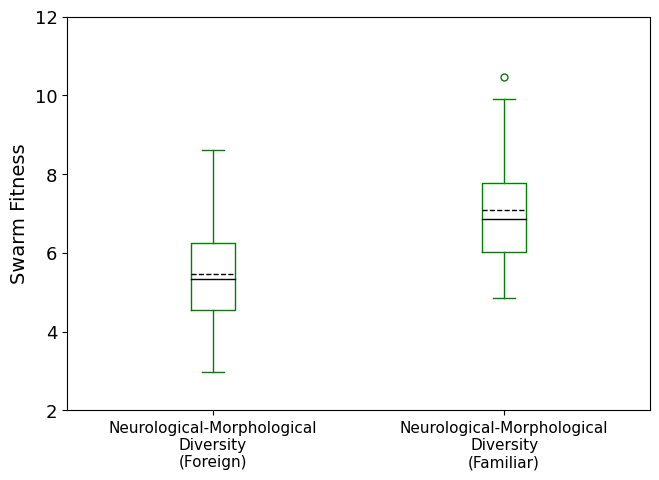

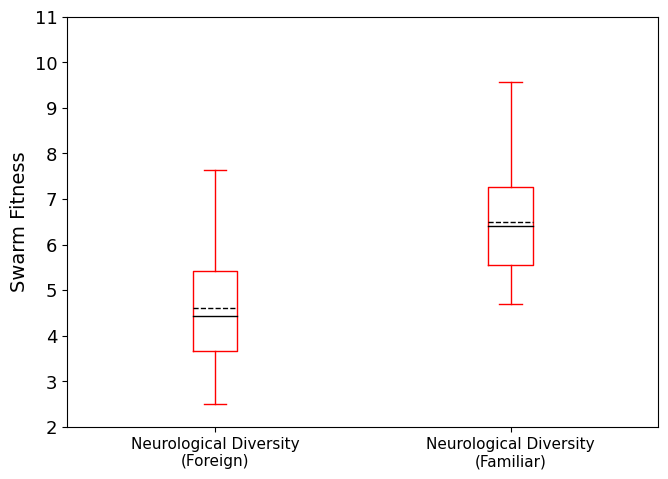

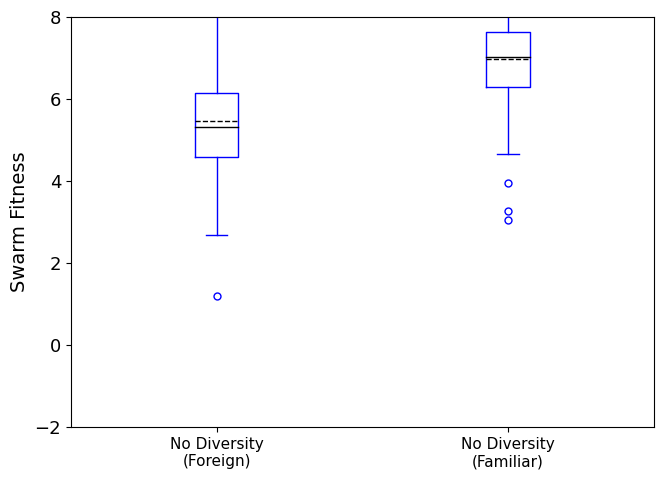

In [16]:
side_by_side_box_plots(case3_evolved_foreign,case3_evolved_familiar, labels=['Neurological-Morphological\nDiversity\n(Foreign)', 'Neurological-Morphological\nDiversity\n(Familiar)'], colors=['green', 'green'], yaxis= (2, 12))
side_by_side_box_plots(case2_evolved_foreign,case2_evolved_familiar, labels=['Neurological Diversity\n(Foreign)', 'Neurological Diversity\n(Familiar)'], colors=['red', 'red'], yaxis= (2, 11))
side_by_side_box_plots(case1_evolved_foreign,case1_evolved_familiar, labels=['No Diversity\n(Foreign)', 'No Diversity\n(Familiar)'], colors=['blue', 'blue'], yaxis= (-2, 8))


# Table of evolved foreign comparison

In [17]:
def generate_latex_table(stat_test_function, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_random_foreign, case2_random_foreign, case3_random_foreign, alpha=0.05):
    table = r"""
\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & \multicolumn{1}{c}{\begin{tabular}{c}Evolution Resources\\(P x G)\end{tabular}} & Environment & {p-value} \\
    \midrule
    """

    # Helper function to add rows to the table
    def add_row(comparison, resources, environment, p_value):
        nonlocal table
        table += f"{comparison} & {resources} & {environment} & {p_value:.3e} \\\\\n"

    # Perform T-tests and add rows to the table
    add_row("Case 1 vs. Case 3", "10 x 75", "Foreign", stat_test_function(case1_evolved_foreign, case3_evolved_foreign, 0.05/2))
    add_row("Case 2 vs. Case 3", "10 x 75", "Foreign", stat_test_function(case2_evolved_foreign, case3_evolved_foreign, 0.05/2))

    table += r"""
    \bottomrule
    \end{tabular}
    \caption{Depicted are statistical comparisons between average swarm fitness between swarm types in the foreign environment. Swarm fitnesses were averaged over 55 trials. Each robot of a swarm utilized 10 parents and 75 generations for its evolution. Both comparisons revealed a statistically significant difference with a significance level of 0.025.}
\end{table}
    """

    return table


table1 = generate_latex_table(mann_whitney_u_test, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, alpha=0.05/2)

print(table1)

t statistic: 1815.00000, p-value: 0.9393353532121992,  alpha: 0.025, not significant
t statistic: 1104.00000, p-value: 0.0002618033933809891,  alpha: 0.025, significant

\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & \multicolumn{1}{c}{\begin{tabular}{c}Evolution Resources\\(P x G)\end{tabular}} & Environment & {p-value} \\
    \midrule
    Case 1 vs. Case 3 & 10 x 75 & Foreign & 9.393e-01 \\
Case 2 vs. Case 3 & 10 x 75 & Foreign & 2.618e-04 \\

    \bottomrule
    \end{tabular}
    \caption{Depicted are statistical comparisons between average swarm fitness between swarm types in the foreign environment. Swarm fitnesses were averaged over 55 trials. Each robot of a swarm utilized 10 parents and 75 generations for its evolution. Both comparisons revealed a statistically significant difference with a significance level of 0.025.}
\end{table}
    


In [18]:
def generate_latex_table(stat_test_function, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_random_foreign, case2_random_foreign, case3_random_foreign, alpha=0.05):
    table = r"""
\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & Environment & {p-value} \\
    \midrule
    """

    # Helper function to add rows to the table
    def add_row(comparison, environment, p_value):
        nonlocal table
        table += f"{comparison} & {environment} & {p_value:.3e} \\\\\n"

    # Perform T-tests and add rows to the table
    add_row("Case 1 (Evolved) vs. Case 1 (Random)", "Foreign", stat_test_function(case1_evolved_foreign, case1_random_familiar, alpha))
    add_row("Case 2 (Evolved) vs. Case 2 (Random)", "Foreign", stat_test_function(case2_evolved_foreign, case2_random_familiar, alpha))
    add_row("Case 3 (Evolved) vs. Case 3 (Random)", "Foreign", stat_test_function(case3_evolved_foreign, case3_random_familiar, alpha))

    table += r"""
    \bottomrule
    \end{tabular}
    \caption{Depicted are statistical comparisons of average swarm fitness between swarms of the same type in different environments with the same evolution resources. Each robot utilized 10 parents and 75 generations for its evolution. Swarm fitnesses were averaged over 30 trials. Each comparison revealed a statistically significant difference using a t-test with a significance level of 0.05}
\end{table}
    """

    return table

# Use MW-U here because random data is not normally distributed
table1 = generate_latex_table(mann_whitney_u_test, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, alpha=0.05)
print(table1)

t statistic: 3500.00000, p-value: 4.660286777269967e-19,  alpha: 0.05, significant
t statistic: 3574.00000, p-value: 1.2969803003521469e-20,  alpha: 0.05, significant
t statistic: 3583.00000, p-value: 8.304898920569675e-21,  alpha: 0.05, significant

\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & Environment & {p-value} \\
    \midrule
    Case 1 (Evolved) vs. Case 1 (Random) & Foreign & 4.660e-19 \\
Case 2 (Evolved) vs. Case 2 (Random) & Foreign & 1.297e-20 \\
Case 3 (Evolved) vs. Case 3 (Random) & Foreign & 8.305e-21 \\

    \bottomrule
    \end{tabular}
    \caption{Depicted are statistical comparisons of average swarm fitness between swarms of the same type in different environments with the same evolution resources. Each robot utilized 10 parents and 75 generations for its evolution. Swarm fitnesses were averaged over 30 trials. Each comparison revealed a statistically significant difference using a t-test with a significance le

In [19]:
def generate_latex_table(stat_test_function, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_random_foreign, case2_random_foreign, case3_random_foreign, alpha=0.05):
    table = r"""
\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & \multicolumn{1}{c}{\begin{tabular}{c}Evolution Resources\\(P x G)\end{tabular}} & {p-value} \\
    \midrule
    """

    # Helper function to add rows to the table
    def add_row(comparison, resources, p_value):
        nonlocal table
        table += f"{comparison} & {resources} & {p_value:.3e} \\\\\n"

    # Perform T-tests and add rows to the table
    add_row("Case 1 (Foreign) vs. Case 1 (Familiar)", "10 x 75", stat_test_function(case1_evolved_foreign, case1_evolved_familiar, alpha))
    add_row("Case 2 (Foreign) vs. Case 2 (Familiar)", "10 x 75", stat_test_function(case2_evolved_foreign, case2_evolved_familiar, alpha))
    add_row("Case 3 (Foreign) vs. Case 3 (Familiar)", "10 x 75", stat_test_function(case3_evolved_foreign, case3_evolved_familiar, alpha))

    table += r"""
    \bottomrule
    \end{tabular}
    \caption{Statistical Comparisons between Evolved Swarms in Different Environments}
\end{table}
    """

    return table

table1 = generate_latex_table(mann_whitney_u_test, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, alpha=0.05)
print(table1)

t statistic: 798.00000, p-value: 1.4681338558246038e-07,  alpha: 0.05, significant
t statistic: 471.00000, p-value: 3.106573721405847e-12,  alpha: 0.05, significant
t statistic: 691.00000, p-value: 5.951455309680416e-09,  alpha: 0.05, significant

\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & \multicolumn{1}{c}{\begin{tabular}{c}Evolution Resources\\(P x G)\end{tabular}} & {p-value} \\
    \midrule
    Case 1 (Foreign) vs. Case 1 (Familiar) & 10 x 75 & 1.468e-07 \\
Case 2 (Foreign) vs. Case 2 (Familiar) & 10 x 75 & 3.107e-12 \\
Case 3 (Foreign) vs. Case 3 (Familiar) & 10 x 75 & 5.951e-09 \\

    \bottomrule
    \end{tabular}
    \caption{Statistical Comparisons between Evolved Swarms in Different Environments}
\end{table}
    
